<a href="https://colab.research.google.com/github/CarlosLeandro09/DataAnalysisRadiology/blob/main/Um_pouco_de_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Seja bem-vindo(a) ao meu caderno de anotações PANDAS!**

**1.** Importações importantes para um estágio inicial

In [ ]:
import pandas as pd
import numpy as np

**2.** Dados em uma escala temporal: **Séries**

In [ ]:
series = pd.Series([np.nan, 0, 1, 2])
series

0    NaN
1    0.0
2    1.0
3    2.0
dtype: float64

**3.** Ainda relativo a séries, vamos "manipular" **datas**...

pd.date_range(start=None, end=None, periods=None, freq=None, tz=None, normalize=False, name=None, closed=None, **kwargs)   

In [ ]:
datas = pd.date_range("20200101",periods=4,freq="D")
datas

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04'], dtype='datetime64[ns]', freq='D')

**4.** Criação de **DataFrame**

In [ ]:
df = pd.DataFrame(np.random.randn(4,4), index = datas, columns = list("ABCD"))
df

,A,B,C,D
2020-01-01,1.149571,-0.234212,0.071616,-1.121636
2020-01-02,0.883438,0.813083,0.865671,-0.348938
2020-01-03,-0.330079,-0.830229,0.534089,-0.931036
2020-01-04,0.129529,-0.521733,-0.172734,-0.321542


In [ ]:
df2 = pd.DataFrame({"A":7,
                    "B":pd.Series(1,index=list(range(5)),dtype="float32"),
                    "C":np.array([3]*5,dtype="int32"), 
                    "D":pd.Categorical(["Carro","Coelho","Caipora","Cigarro","Cinema"]),
                    "E":pd.Timestamp("20190204"),
                    "F":"Dragonball"})
df2

,A,B,C,D,E,F
0,7,1.0,3,Carro,2019-02-04,Dragonball
1,7,1.0,3,Coelho,2019-02-04,Dragonball
2,7,1.0,3,Caipora,2019-02-04,Dragonball
3,7,1.0,3,Cigarro,2019-02-04,Dragonball
4,7,1.0,3,Cinema,2019-02-04,Dragonball


In [ ]:
df2.head(3)

,A,B,C,D,E,F
0,7,1.0,3,Carro,2019-02-04,Dragonball
1,7,1.0,3,Coelho,2019-02-04,Dragonball
2,7,1.0,3,Caipora,2019-02-04,Dragonball


In [ ]:
df2.tail(3)

,A,B,C,D,E,F
2,7,1.0,3,Caipora,2019-02-04,Dragonball
3,7,1.0,3,Cigarro,2019-02-04,Dragonball
4,7,1.0,3,Cinema,2019-02-04,Dragonball


In [ ]:
df2.index

Int64Index([0, 1, 2, 3, 4], dtype='int64')

In [ ]:
df2.columns

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')

In [ ]:
#df --> Tira índices e colunas
df.to_numpy()

array([[ 1.14957108, -0.23421168,  0.07161611, -1.12163583],
       [ 0.8834381 ,  0.81308338,  0.86567082, -0.34893769],
       [-0.33007928, -0.83022937,  0.53408869, -0.93103558],
       [ 0.129529  , -0.5217331 , -0.17273409, -0.32154225]])

In [ ]:
#Mais ou menos a mesma coisa que a célula anterior
df.values

array([[ 1.14957108, -0.23421168,  0.07161611, -1.12163583],
       [ 0.8834381 ,  0.81308338,  0.86567082, -0.34893769],
       [-0.33007928, -0.83022937,  0.53408869, -0.93103558],
       [ 0.129529  , -0.5217331 , -0.17273409, -0.32154225]])

In [ ]:
np.size(df.values)

16

In [ ]:
df2.dtypes

A             int64
B           float32
C             int32
D          category
E    datetime64[ns]
F            object
dtype: object

In [ ]:
df2.shape

(5, 6)

**5.** Adição de **colunas** ao DataFrame

In [ ]:
df2["G"] = pd.Series("RX",index=list(range(5)),dtype="str")
df2

,A,B,C,D,E,F,G
0,7,1.0,3,Carro,2019-02-04,Dragonball,RX
1,7,1.0,3,Coelho,2019-02-04,Dragonball,RX
2,7,1.0,3,Caipora,2019-02-04,Dragonball,RX
3,7,1.0,3,Cigarro,2019-02-04,Dragonball,RX
4,7,1.0,3,Cinema,2019-02-04,Dragonball,RX


**6.** **Operação** entre colunas

In [ ]:
df2["Soma"] = df2["A"] + df2["C"]
df2

,A,B,C,D,E,F,G,Soma
0,7,1.0,3,Carro,2019-02-04,Dragonball,RX,10
1,7,1.0,3,Coelho,2019-02-04,Dragonball,RX,10
2,7,1.0,3,Caipora,2019-02-04,Dragonball,RX,10
3,7,1.0,3,Cigarro,2019-02-04,Dragonball,RX,10
4,7,1.0,3,Cinema,2019-02-04,Dragonball,RX,10


In [ ]:
#Transposta
df2.T

,0,1,2,3,4
A,7,7,7,7,7
B,1,1,1,1,1
C,3,3,3,3,3
D,Carro,Coelho,Caipora,Cigarro,Cinema
E,2019-02-04 00:00:00,2019-02-04 00:00:00,2019-02-04 00:00:00,2019-02-04 00:00:00,2019-02-04 00:00:00
F,Dragonball,Dragonball,Dragonball,Dragonball,Dragonball
G,RX,RX,RX,RX,RX
Soma,10,10,10,10,10


**7.** **Concatenando** dataframes

In [ ]:
df1 = pd.DataFrame(np.random.randn(2,2), index = pd.date_range("20190104",periods=2,freq="D"), columns = list("AB"))
df2 = pd.DataFrame(np.random.randn(2,2), index = pd.date_range("20190106",periods=2,freq="D"), columns = list("AB"))
df3 = pd.DataFrame(np.random.randn(2,2), index = pd.date_range("20190108",periods=2,freq="D"), columns = list("AB"))

In [ ]:
combinacao = pd.concat([df1,df2,df3],keys=["df1","df2","df3"])
combinacao

A         B
df1 2019-01-04 -1.546895  0.489332
    2019-01-05 -0.192416  0.650561
df2 2019-01-06  0.780978  0.155087
    2019-01-07  0.381999  0.494723
df3 2019-01-08  0.009768 -0.563953
    2019-01-09  0.957095  0.032857

In [ ]:
#Removendo valores repetidos
combinacao["ValoresRepetidos"] = list("XYXKXL")
combinacao.drop_duplicates(subset="ValoresRepetidos")

A         B ValoresRepetidos
df1 2019-01-04 -1.546895  0.489332                X
    2019-01-05 -0.192416  0.650561                Y
df2 2019-01-07  0.381999  0.494723                K
df3 2019-01-09  0.957095  0.032857                L

In [ ]:
#"Selecionando" informações da coluna
combinacao["A"]

df1  2019-01-04   -1.546895
     2019-01-05   -0.192416
df2  2019-01-06    0.780978
     2019-01-07    0.381999
df3  2019-01-08    0.009768
     2019-01-09    0.957095
Name: A, dtype: float64

In [ ]:
#Selecionando key
combinacao.loc["df1"]

,A,B,ValoresRepetidos
2019-01-04,-1.546895,0.489332,X
2019-01-05,-0.192416,0.650561,Y


**8.** Aplicando **Merge**

In [ ]:
df4 = pd.DataFrame({'ID': [123,321,231,213],
                    'lkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [1, 2, 3, 5],
                    'Compras':[00,11,22,33]})
df5 = pd.DataFrame({'ID': [123,323,231,212],
                    'rkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [5, 6, 7, 8]})

In [ ]:
#Intersecção --> Valores iguais
pd.merge(df4,df5,how="inner",on=["ID"],suffixes=["_A","_B"])

,ID,lkey,value_A,Compras,rkey,value_B
0,123,foo,1,0,foo,5
1,231,baz,3,22,baz,7


In [ ]:
#Left join --> Valores iguais + conjunto da esquerda
pd.merge(df4,df5,how="left",on='ID')

,ID,lkey,value_x,Compras,rkey,value_y
0,123,foo,1,0,foo,5.0
1,321,bar,2,11,NaN,NaN
2,231,baz,3,22,baz,7.0
3,213,foo,5,33,NaN,NaN


In [ ]:
#Outer --> Compara os df's para cada ID reportando lados
pd.merge(df4,df5,how='outer',on='ID',indicator=True)

,ID,lkey,value_x,Compras,rkey,value_y,_merge
0,123,foo,1.0,0.0,foo,5.0,both
1,321,bar,2.0,11.0,NaN,NaN,left_only
2,231,baz,3.0,22.0,baz,7.0,both
3,213,foo,5.0,33.0,NaN,NaN,left_only
4,323,NaN,NaN,NaN,bar,6.0,right_only
5,212,NaN,NaN,NaN,foo,8.0,right_only


**9.** Vamos ver agora o famoso **Groupby**

In [ ]:
grupinho = pd.DataFrame({'A':["RX","CT","RX","CT","RX","CT"],
                         'B':[1,1,2,2,2,1],
                         'C':np.random.randn(6)})
grupinho

,A,B,C
0,RX,1,0.128276
1,CT,1,-0.693762
2,RX,2,-1.719548
3,CT,2,-0.010308
4,RX,2,-1.697723
5,CT,1,0.969366


In [ ]:
group = grupinho.groupby(["A"]).sum()
group

,B,C
A,,
CT,4,0.265295
RX,5,-3.288996


In [ ]:
group.loc['CT']

B    4.000000
C    0.265295
Name: CT, dtype: float64

In [ ]:
# Cada grupo funciona parecido com tabelas concatenadas
group2 = grupinho.groupby(["A","B"]).sum()
group2

C
A  B          
CT 1  0.275604
   2 -0.010308
RX 1  0.128276
   2 -3.417272

**10. Indexações**

In [ ]:
arrays = [[1,1,3,3],['A','B','A','B']]
pd.MultiIndex.from_arrays(arrays,names=('numero','letra'))

MultiIndex([(1, 'A'),
            (1, 'B'),
            (3, 'A'),
            (3, 'B')],
           names=['numero', 'letra'])

In [ ]:
#Produto cartesiano
numbers = [1,2,3]
letras = ['A','B']
pd.MultiIndex.from_product([numbers,letras],names=('numero','letra'))

MultiIndex([(1, 'A'),
            (1, 'B'),
            (2, 'A'),
            (2, 'B'),
            (3, 'A'),
            (3, 'B')],
           names=['numero', 'letra'])

**11. Reshaping**

In [ ]:
datass = pd.date_range("20200101",periods=4,freq="D")
dff = pd.DataFrame(np.random.randn(4,4), index = datas, columns = list("ABCD"))
dff

,A,B,C,D
2020-01-01,-0.742856,-0.550604,-0.831476,1.311373
2020-01-02,0.464441,-1.053299,-0.944852,-0.506239
2020-01-03,0.313587,1.279952,0.102708,-0.804979
2020-01-04,-0.470285,0.378381,-0.811864,1.910698


In [ ]:
y = dff.values
y.reshape((2,8)) 

array([[-0.74285624, -0.55060357, -0.83147578,  1.31137272,  0.46444082,
        -1.05329867, -0.94485246, -0.5062394 ],
       [ 0.31358693,  1.27995244,  0.10270793, -0.80497859, -0.47028457,
         0.37838113, -0.81186366,  1.91069808]])

In [ ]:
#Função Pivot

In [ ]:
dias = pd.date_range(start="20201010",periods=12,freq="D")
pessoas = ["Carlos","Natasha","Karoline"]

nomes = []
gastos = []
for i in range(12):
  nomes.append(np.random.choice(pessoas))
  gastos.append(np.random.rand()*100)

dataf = pd.DataFrame({'Dia':dias,'Nome':nomes,'Gasto':gastos})
dataf.pivot(index='Dia',columns='Nome',values='Gasto')

Nome,Carlos,Karoline,Natasha
Dia,,,
2020-10-10,39.801717,NaN,NaN
2020-10-11,53.731631,NaN,NaN
2020-10-12,NaN,NaN,99.659397
2020-10-13,NaN,20.613570,NaN
2020-10-14,3.997052,NaN,NaN
2020-10-15,NaN,84.750897,NaN
2020-10-16,NaN,29.078427,NaN
2020-10-17,62.278016,NaN,NaN
2020-10-18,36.702975,NaN,NaN


In [ ]:
# Função Pivot Table (quando tem "datas" repetidas)

In [ ]:
exames = [2,2,3,2]
dias2 = pd.Timestamp('20201010') 
tecnicos = ['Paulo','Ana','Caio','Ana']
dataf2 = pd.DataFrame({'Exames':exames,'Data':dias2,'Tecnicos':tecnicos})
dataf2.pivot_table(index='Data',columns='Tecnicos',values='Exames',aggfunc='mean')

Tecnicos,Ana,Caio,Paulo
Data,,,
2020-10-10,2,3,2


In [ ]:
dataf2.pivot_table(index='Data',columns='Tecnicos',values='Exames',aggfunc='sum')

Tecnicos,Ana,Caio,Paulo
Data,,,
2020-10-10,4,3,2


In [ ]:
#Stack e Unstack

In [ ]:
df6 = pd.read_csv("https://media.geeksforgeeks.org/wp-content/uploads/nba.csv")
df6.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [ ]:
stack_df6 = df6.stack()
stack_df6

0    Name         Avery Bradley
     Team        Boston Celtics
     Number                   0
     Position                PG
     Age                     25
                      ...      
456  Age                     26
     Height                 7-0
     Weight                 231
     College             Kansas
     Salary              947276
Length: 4018, dtype: object

In [ ]:
unstack_stack_df6 = stack_df6.unstack()
unstack_stack_df6

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,6-2,180,Texas,7.73034e+06
1,Jae Crowder,Boston Celtics,99,SF,25,6-6,235,Marquette,6.79612e+06
2,John Holland,Boston Celtics,30,SG,27,6-5,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,6-5,185,Georgia State,1.14864e+06
4,Jonas Jerebko,Boston Celtics,8,PF,29,6-10,231,NaN,5e+06
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41,PF,20,6-10,234,Kentucky,2.2398e+06
453,Shelvin Mack,Utah Jazz,8,PG,26,6-3,203,Butler,2.43333e+06
454,Raul Neto,Utah Jazz,25,PG,24,6-1,179,NaN,900000
455,Tibor Pleiss,Utah Jazz,21,C,26,7-3,256,NaN,2.9e+06


In [ ]:
#Função Melt

In [ ]:
df7 = pd.DataFrame({'A':list('abcd'),
                    'B':[1,2,3,4],
                    'C':[5,6,7,8]})
df7

,A,B,C
0,a,1,5
1,b,2,6
2,c,3,7
3,d,4,8


In [ ]:
df7.melt(id_vars='A',value_vars=['B','C'],var_name="Letras",value_name="Valores")

,A,Letras,Valores
0,a,B,1
1,b,B,2
2,c,B,3
3,d,B,4
4,a,C,5
5,b,C,6
6,c,C,7
7,d,C,8


In [ ]:
df7.melt(id_vars=['A','B'],var_name="Letras",value_name="Valores")

,A,B,Letras,Valores
0,a,1,C,5
1,b,2,C,6
2,c,3,C,7
3,d,4,C,8


In [ ]:
df7.melt(value_vars=['A','B'],var_name="Letras",value_name="Valores")

,Letras,Valores
0,A,a
1,A,b
2,A,c
3,A,d
4,B,1
5,B,2
6,B,3
7,B,4


**12. Filtros e manipulações**

In [ ]:
df6.head(10)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
5,Amir Johnson,Boston Celtics,90.0,PF,29.0,6-9,240.0,NaN,12000000.0
6,Jordan Mickey,Boston Celtics,55.0,PF,21.0,6-8,235.0,LSU,1170960.0
7,Kelly Olynyk,Boston Celtics,41.0,C,25.0,7-0,238.0,Gonzaga,2165160.0
8,Terry Rozier,Boston Celtics,12.0,PG,22.0,6-2,190.0,Louisville,1824360.0
9,Marcus Smart,Boston Celtics,36.0,PG,22.0,6-4,220.0,Oklahoma State,3431040.0


In [ ]:
#Selecionar coluna

In [ ]:
df6['Name'].head()

0    Avery Bradley
1      Jae Crowder
2     John Holland
3      R.J. Hunter
4    Jonas Jerebko
Name: Name, dtype: object

In [ ]:
#Selecionar linhas

In [ ]:
df6[1:5]

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [ ]:
df6.loc[:,["Name","Team"]]

,Name,Team
0,Avery Bradley,Boston Celtics
1,Jae Crowder,Boston Celtics
2,John Holland,Boston Celtics
3,R.J. Hunter,Boston Celtics
4,Jonas Jerebko,Boston Celtics
...,...,...
453,Shelvin Mack,Utah Jazz
454,Raul Neto,Utah Jazz
455,Tibor Pleiss,Utah Jazz
456,Jeff Withey,Utah Jazz


In [ ]:
# loc usa para o nome
w = df6.loc[1:3,["Name","Team"]]
w

,Name,Team
1,Jae Crowder,Boston Celtics
2,John Holland,Boston Celtics
3,R.J. Hunter,Boston Celtics


In [ ]:
len(w)

3

In [ ]:
# iloc usa índice
df6.iloc[1:3,0:3]


,Name,Team,Number
1,Jae Crowder,Boston Celtics,99.0
2,John Holland,Boston Celtics,30.0


In [ ]:
df6.iloc[[1,3],[0,4]]

,Name,Age
1,Jae Crowder,25.0
3,R.J. Hunter,22.0


In [ ]:
df6[(df6.Age < 21) & (df6.Number < 10)]

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
40,Kristaps Porzingis,New York Knicks,6.0,PF,20.0,7-3,240.0,NaN,4131720.0
56,Jahlil Okafor,Philadelphia 76ers,8.0,C,20.0,6-11,275.0,Duke,4582680.0
116,D'Angelo Russell,Los Angeles Lakers,1.0,PG,20.0,6-5,195.0,Ohio State,5103120.0
122,Devin Booker,Phoenix Suns,1.0,SG,19.0,6-6,206.0,Kentucky,2127840.0
192,Stanley Johnson,Detroit Pistons,3.0,SF,20.0,6-7,245.0,Arizona,2841960.0
356,Aaron Gordon,Orlando Magic,0.0,PF,20.0,6-9,220.0,Arizona,4171680.0
393,Emmanuel Mudiay,Denver Nuggets,0.0,PG,20.0,6-5,200.0,NaN,3102240.0
401,Tyus Jones,Minnesota Timberwolves,1.0,PG,20.0,6-2,195.0,Duke,1282080.0


**13. Limpeza de dados**

In [ ]:
datas2 = pd.date_range('20200110', periods=6, freq= 'D')
df8 = pd.DataFrame(np.random.randn(6,4), index=datas2,columns=list('ABCD'))
df8

,A,B,C,D
2020-01-10,1.329057,-1.033578,-0.124310,1.209265
2020-01-11,-0.608489,0.347879,1.717704,-1.041381
2020-01-12,-0.409711,-1.264921,-0.500588,0.208002
2020-01-13,-2.992669,-0.617554,0.092811,0.376457
2020-01-14,-1.268133,0.063391,0.876160,-0.608024
2020-01-15,-1.023586,0.924807,-0.699183,-1.219850


In [ ]:
df8.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.828922,-0.263329,0.227099,-0.179255
std,1.399557,0.850169,0.913480,0.937733
min,-2.992669,-1.264921,-0.699183,-1.219850
25%,-1.206996,-0.929572,-0.406518,-0.933042
50%,-0.816037,-0.277082,-0.015749,-0.200011
75%,-0.459406,0.276757,0.680323,0.334343
max,1.329057,0.924807,1.717704,1.209265


In [ ]:
df9 = df8.reindex(index=datas2[0:4],columns= list(df8.columns) + ['New'])
df9.loc[datas2[0]:datas2[1],'New'] = 1
df9

,A,B,C,D,New
2020-01-10,1.329057,-1.033578,-0.124310,1.209265,1.0
2020-01-11,-0.608489,0.347879,1.717704,-1.041381,1.0
2020-01-12,-0.409711,-1.264921,-0.500588,0.208002,NaN
2020-01-13,-2.992669,-0.617554,0.092811,0.376457,NaN


In [ ]:
faltantes = df9.isnull().sum()
faltantes

A      0
B      0
C      0
D      0
New    2
dtype: int64

In [ ]:
#Se não tiver correspondencia fica como NaN
df9.reindex(list('123456'))

,A,B,C,D,New
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN


In [ ]:
#NAN
df10 = df9.dropna()
mediaNew = df10.New.mean()
array = df9.New.fillna(mediaNew)
df9['New'] = array
df9

,A,B,C,D,New
2020-01-10,1.329057,-1.033578,-0.124310,1.209265,1.0
2020-01-11,-0.608489,0.347879,1.717704,-1.041381,1.0
2020-01-12,-0.409711,-1.264921,-0.500588,0.208002,1.0
2020-01-13,-2.992669,-0.617554,0.092811,0.376457,1.0


In [ ]:
faltantes = df9.isnull().sum()
faltantes

A      0
B      0
C      0
D      0
New    0
dtype: int64

In [ ]:
df9.nunique(axis=0,dropna=False)

A      4
B      4
C      4
D      4
New    1
dtype: int64

In [ ]:
df9.nunique(axis=1,dropna=False)

2020-01-10    5
2020-01-11    5
2020-01-12    5
2020-01-13    5
Freq: D, dtype: int64

In [ ]:
df13 = df9.drop_duplicates(subset='New',keep='first')
df13

,A,B,C,D,New
2020-01-10,1.329057,-1.033578,-0.12431,1.209265,1.0


In [ ]:
datas3 = pd.date_range('20200110', periods=4, freq= 'M')
dataframe = pd.DataFrame(np.random.randn(4,4), index=datas3,columns=list('ABCD'))
dataframe.sort_values(by=['A'],axis=0,ascending=True)

,A,B,C,D
2020-01-31,-0.424476,0.666209,-0.465976,2.107720
2020-02-29,-0.161192,-0.773605,0.465188,0.545170
2020-03-31,0.118030,-0.899420,0.338128,0.897728
2020-04-30,0.610203,2.030413,1.365209,2.487647


**14. Importando e exportando dados**

Importando
*   pd.read_csv()
*   dp.read_excel()

Exportando
*   df.to_csv()







**15. Visualização de dados**

In [ ]:
#Biblioteca usada
import matplotlib.pyplot as plt

In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [ ]:
plt.style.use('seaborn')

In [ ]:
df14 = pd.read_csv("https://media.geeksforgeeks.org/wp-content/uploads/nba.csv")
df14.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


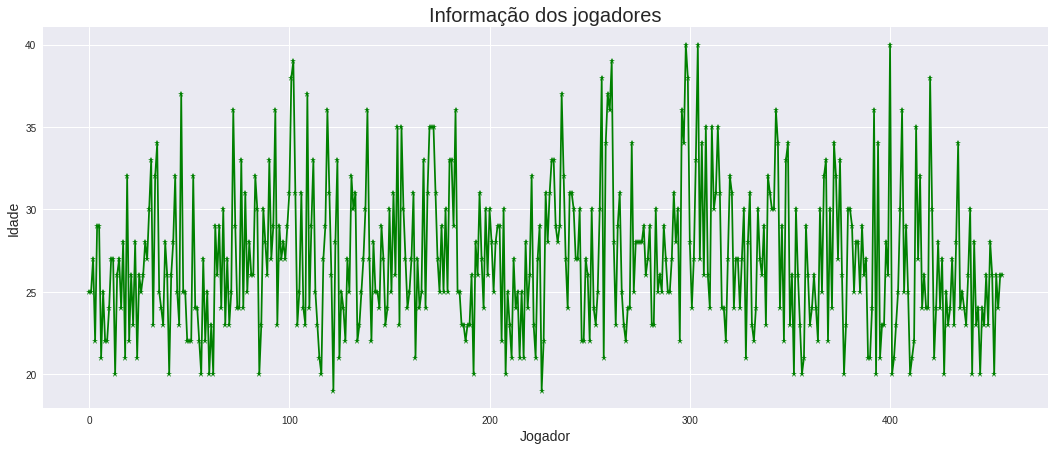

In [ ]:
plt.rcParams['figure.figsize'] = (18,7)
plt.plot(df14.Age,'*-g')
plt.title('Informação dos jogadores',size=20)
plt.xlabel('Jogador',size=14)
plt.ylabel('Idade',size=14)
plt.show()

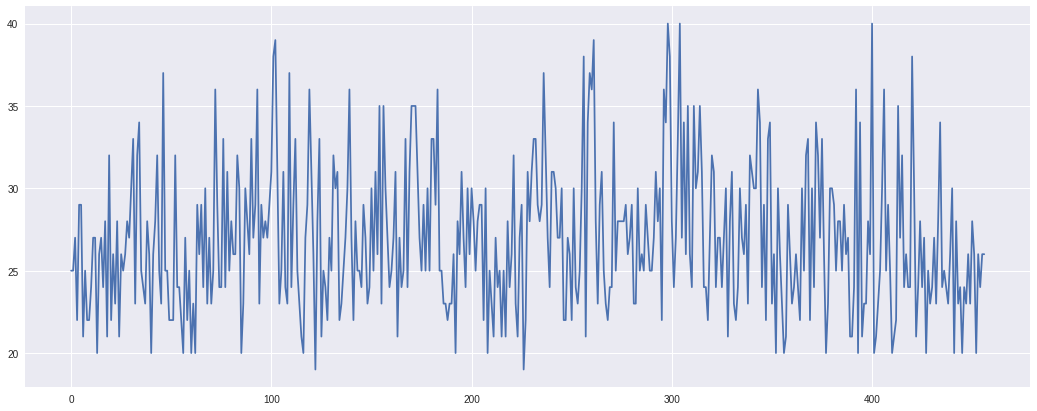

In [ ]:
#Outro jeito
df14.Age.plot()
plt.show()

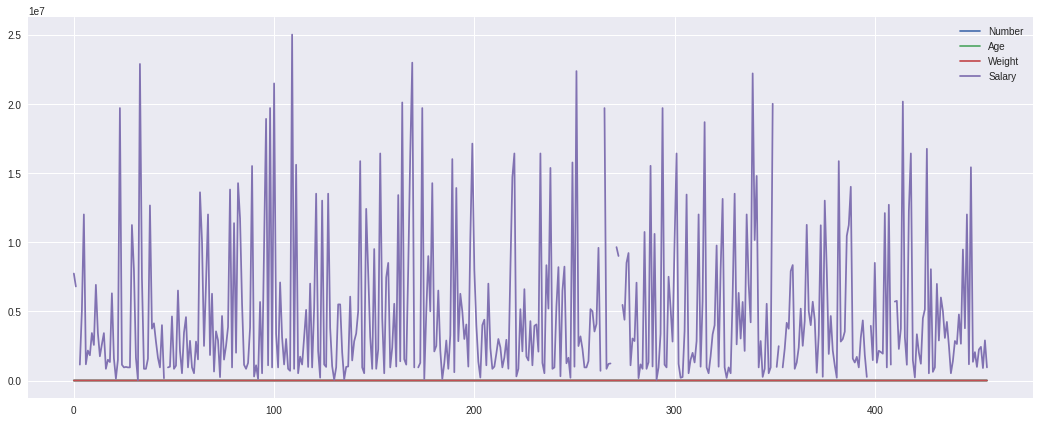

In [ ]:
#Plota tudo de vez
df14.plot()
plt.show()

**Referências:** https://www.udemy.com/course/manipulacao-e-analise-de-dados-com-pandas-python/